## Import and loading data

In [25]:
# Import packages
# For data manipulation
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For date conversions
from datetime import datetime

# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
# Upload data
df = pd.read_csv("tech_stock_data.csv")

## Data Exploration

In [3]:
# Basic information of the dataset
print("Shape of dataset: ",df.shape)
df.info()

Shape of dataset:  (300, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Time               300 non-null    object 
 1   Ticker             300 non-null    object 
 2   Company            300 non-null    object 
 3   Field              300 non-null    object 
 4   Close_price        300 non-null    float64
 5   Return             300 non-null    float64
 6   Market_cap         300 non-null    float64
 7   Market_cap_change  300 non-null    float64
 8   Enterprise_value   300 non-null    float64
 9   Trailing_PE        300 non-null    float64
 10  PEG_ratio          300 non-null    float64
 11  Price_to_Sales     300 non-null    float64
 12  Price_to_Book      300 non-null    float64
 13  EV_to_revenue      300 non-null    float64
 14  EV_to_EBITDA       300 non-null    float64
 15  Div_yield          300 non-null    float64
dt

In [4]:
# Check for missing values
print('Total count of missing values:', df.isna().sum().sum())

# Display missing values per column in dataframe
print('Missing values per column:')
df.isna().sum()

Total count of missing values: 0
Missing values per column:


Time                 0
Ticker               0
Company              0
Field                0
Close_price          0
Return               0
Market_cap           0
Market_cap_change    0
Enterprise_value     0
Trailing_PE          0
PEG_ratio            0
Price_to_Sales       0
Price_to_Book        0
EV_to_revenue        0
EV_to_EBITDA         0
Div_yield            0
dtype: int64

In [5]:
#Check for duplicates
df.duplicated().sum()

0

In [6]:
# Descriptive statistics of the data
df.describe()

,Close_price,Return,Market_cap,Market_cap_change,Enterprise_value,Trailing_PE,PEG_ratio,Price_to_Sales,Price_to_Book,EV_to_revenue,EV_to_EBITDA,Div_yield
count,300.000000,300.000000,3.000000e+02,300.000000,3.000000e+02,300.000000,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000
mean,220.458000,0.073233,3.403123e+11,0.093567,3.408123e+11,109.763033,1.883233,8.66170,14.989133,8.556667,80.260200,0.006333
std,221.583825,0.220170,6.306285e+11,0.202624,6.301304e+11,385.420755,1.559583,6.46666,26.569367,6.292769,1912.419678,0.012209
min,14.990000,-0.500000,7.090000e+09,-0.430000,6.620000e+09,0.000000,0.000000,0.64000,-125.000000,0.590000,-15740.000000,0.000000
25%,73.262500,-0.062500,2.736250e+10,-0.040000,2.760250e+10,0.000000,1.037500,3.95750,3.815000,3.912500,12.582500,0.000000
50%,150.225000,0.050000,1.116350e+11,0.070000,1.095300e+11,28.045000,1.660000,6.92000,8.185000,7.015000,21.605000,0.000000
75%,271.550000,0.180000,2.625975e+11,0.200000,2.669450e+11,56.017500,2.310000,11.91250,16.927500,11.455000,50.185000,0.010000
max,1392.990000,1.110000,3.200000e+12,0.790000,3.200000e+12,4230.000000,11.860000,45.06000,307.310000,44.460000,26690.000000,0.070000


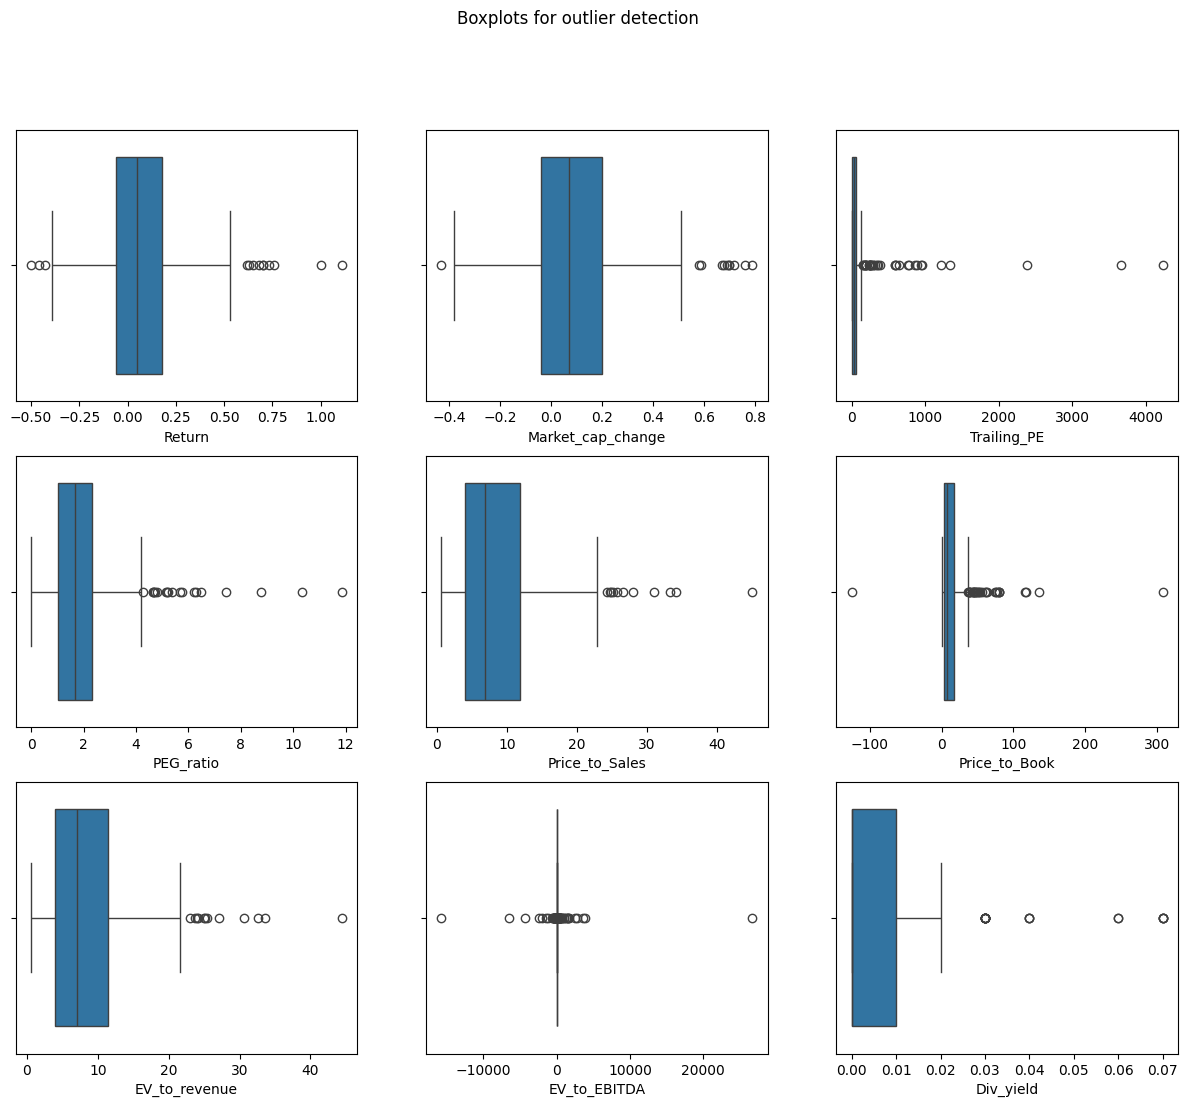

In [7]:
# Check for outliers of each feature
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0, 0], x=df['Return'])
sns.boxplot(ax=axes[0, 1], x=df['Market_cap_change'])
sns.boxplot(ax=axes[0, 2], x=df['Trailing_PE'])
sns.boxplot(ax=axes[1, 0], x=df['PEG_ratio'])
sns.boxplot(ax=axes[1, 1], x=df['Price_to_Sales'])
sns.boxplot(ax=axes[1, 2], x=df['Price_to_Book'])
sns.boxplot(ax=axes[2, 0], x=df['EV_to_revenue'])
sns.boxplot(ax=axes[2, 1], x=df['EV_to_EBITDA'])
sns.boxplot(ax=axes[2, 2], x=df['Div_yield'])

plt.show()

In [57]:
# Impute outliers for EV_to_EBITDA

q1 = df['EV_to_EBITDA'].quantile(0.25)
q3 = df['EV_to_EBITDA'].quantile(0.75)
iqr = q3 - q1

upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

df.loc[df['EV_to_EBITDA'] < lower_limit, 'EV_to_EBITDA'] = lower_limit
df.loc[df['EV_to_EBITDA'] > upper_limit, 'EV_to_EBITDA'] = upper_limit

# Define upper and lower limits (optional)
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

# Impute outliers for other columns
for column in ['Trailing_PE', 'PEG_ratio', 'Price_to_Sales', 'Price_to_Book', 'EV_to_revenue']:
    threshold = df[column].quantile(0.75)
    df.loc[df[column] > threshold, column] = threshold

In [9]:
df.describe()

,Close_price,Return,Market_cap,Market_cap_change,Enterprise_value,Trailing_PE,PEG_ratio,Price_to_Sales,Price_to_Book,EV_to_revenue,EV_to_EBITDA,Div_yield
count,300.000000,300.000000,3.000000e+02,300.000000,3.000000e+02,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,220.458000,0.073233,3.403123e+11,0.093567,3.408123e+11,28.047242,1.503267,7.245925,8.663342,7.110483,32.473200,0.006333
std,221.583825,0.220170,6.306285e+11,0.202624,6.301304e+11,21.678419,0.772904,3.687669,9.680744,3.475816,43.151455,0.012209
min,14.990000,-0.500000,7.090000e+09,-0.430000,6.620000e+09,0.000000,0.000000,0.640000,-125.000000,0.590000,-43.821250,0.000000
25%,73.262500,-0.062500,2.736250e+10,-0.040000,2.760250e+10,0.000000,1.037500,3.957500,3.815000,3.912500,12.582500,0.000000
50%,150.225000,0.050000,1.116350e+11,0.070000,1.095300e+11,28.045000,1.660000,6.920000,8.185000,7.015000,21.605000,0.000000
75%,271.550000,0.180000,2.625975e+11,0.200000,2.669450e+11,55.996875,2.310000,11.910625,16.876875,11.443750,50.185000,0.010000
max,1392.990000,1.110000,3.200000e+12,0.790000,3.200000e+12,56.017500,2.310000,11.912500,16.927500,11.455000,106.588750,0.070000


## Data Analysis

### Determine model variables

In [10]:
# Create new dataframe
df0 = df.copy()
desired_columns = ['Return', 'Market_cap_change', 'Trailing_PE', 'PEG_ratio', 
                   'Price_to_Sales', 'Price_to_Book', 'EV_to_revenue', 'EV_to_EBITDA', 'Div_yield']
df0 = df0[desired_columns]
df0.head()

,Return,Market_cap_change,Trailing_PE,PEG_ratio,Price_to_Sales,Price_to_Book,EV_to_revenue,EV_to_EBITDA,Div_yield
0,0.12,0.10,29.55,2.25,7.78,16.9275,7.73,22.19,0.01
1,-0.08,-0.11,26.67,2.11,6.99,16.9275,6.96,20.10,0.01
2,0.08,0.12,31.41,2.31,7.94,16.9275,7.94,23.56,0.00
3,-0.13,-0.12,28.73,2.18,7.10,16.9275,7.09,21.46,0.01
4,0.16,0.17,32.88,2.31,8.08,16.9275,8.06,24.51,0.00


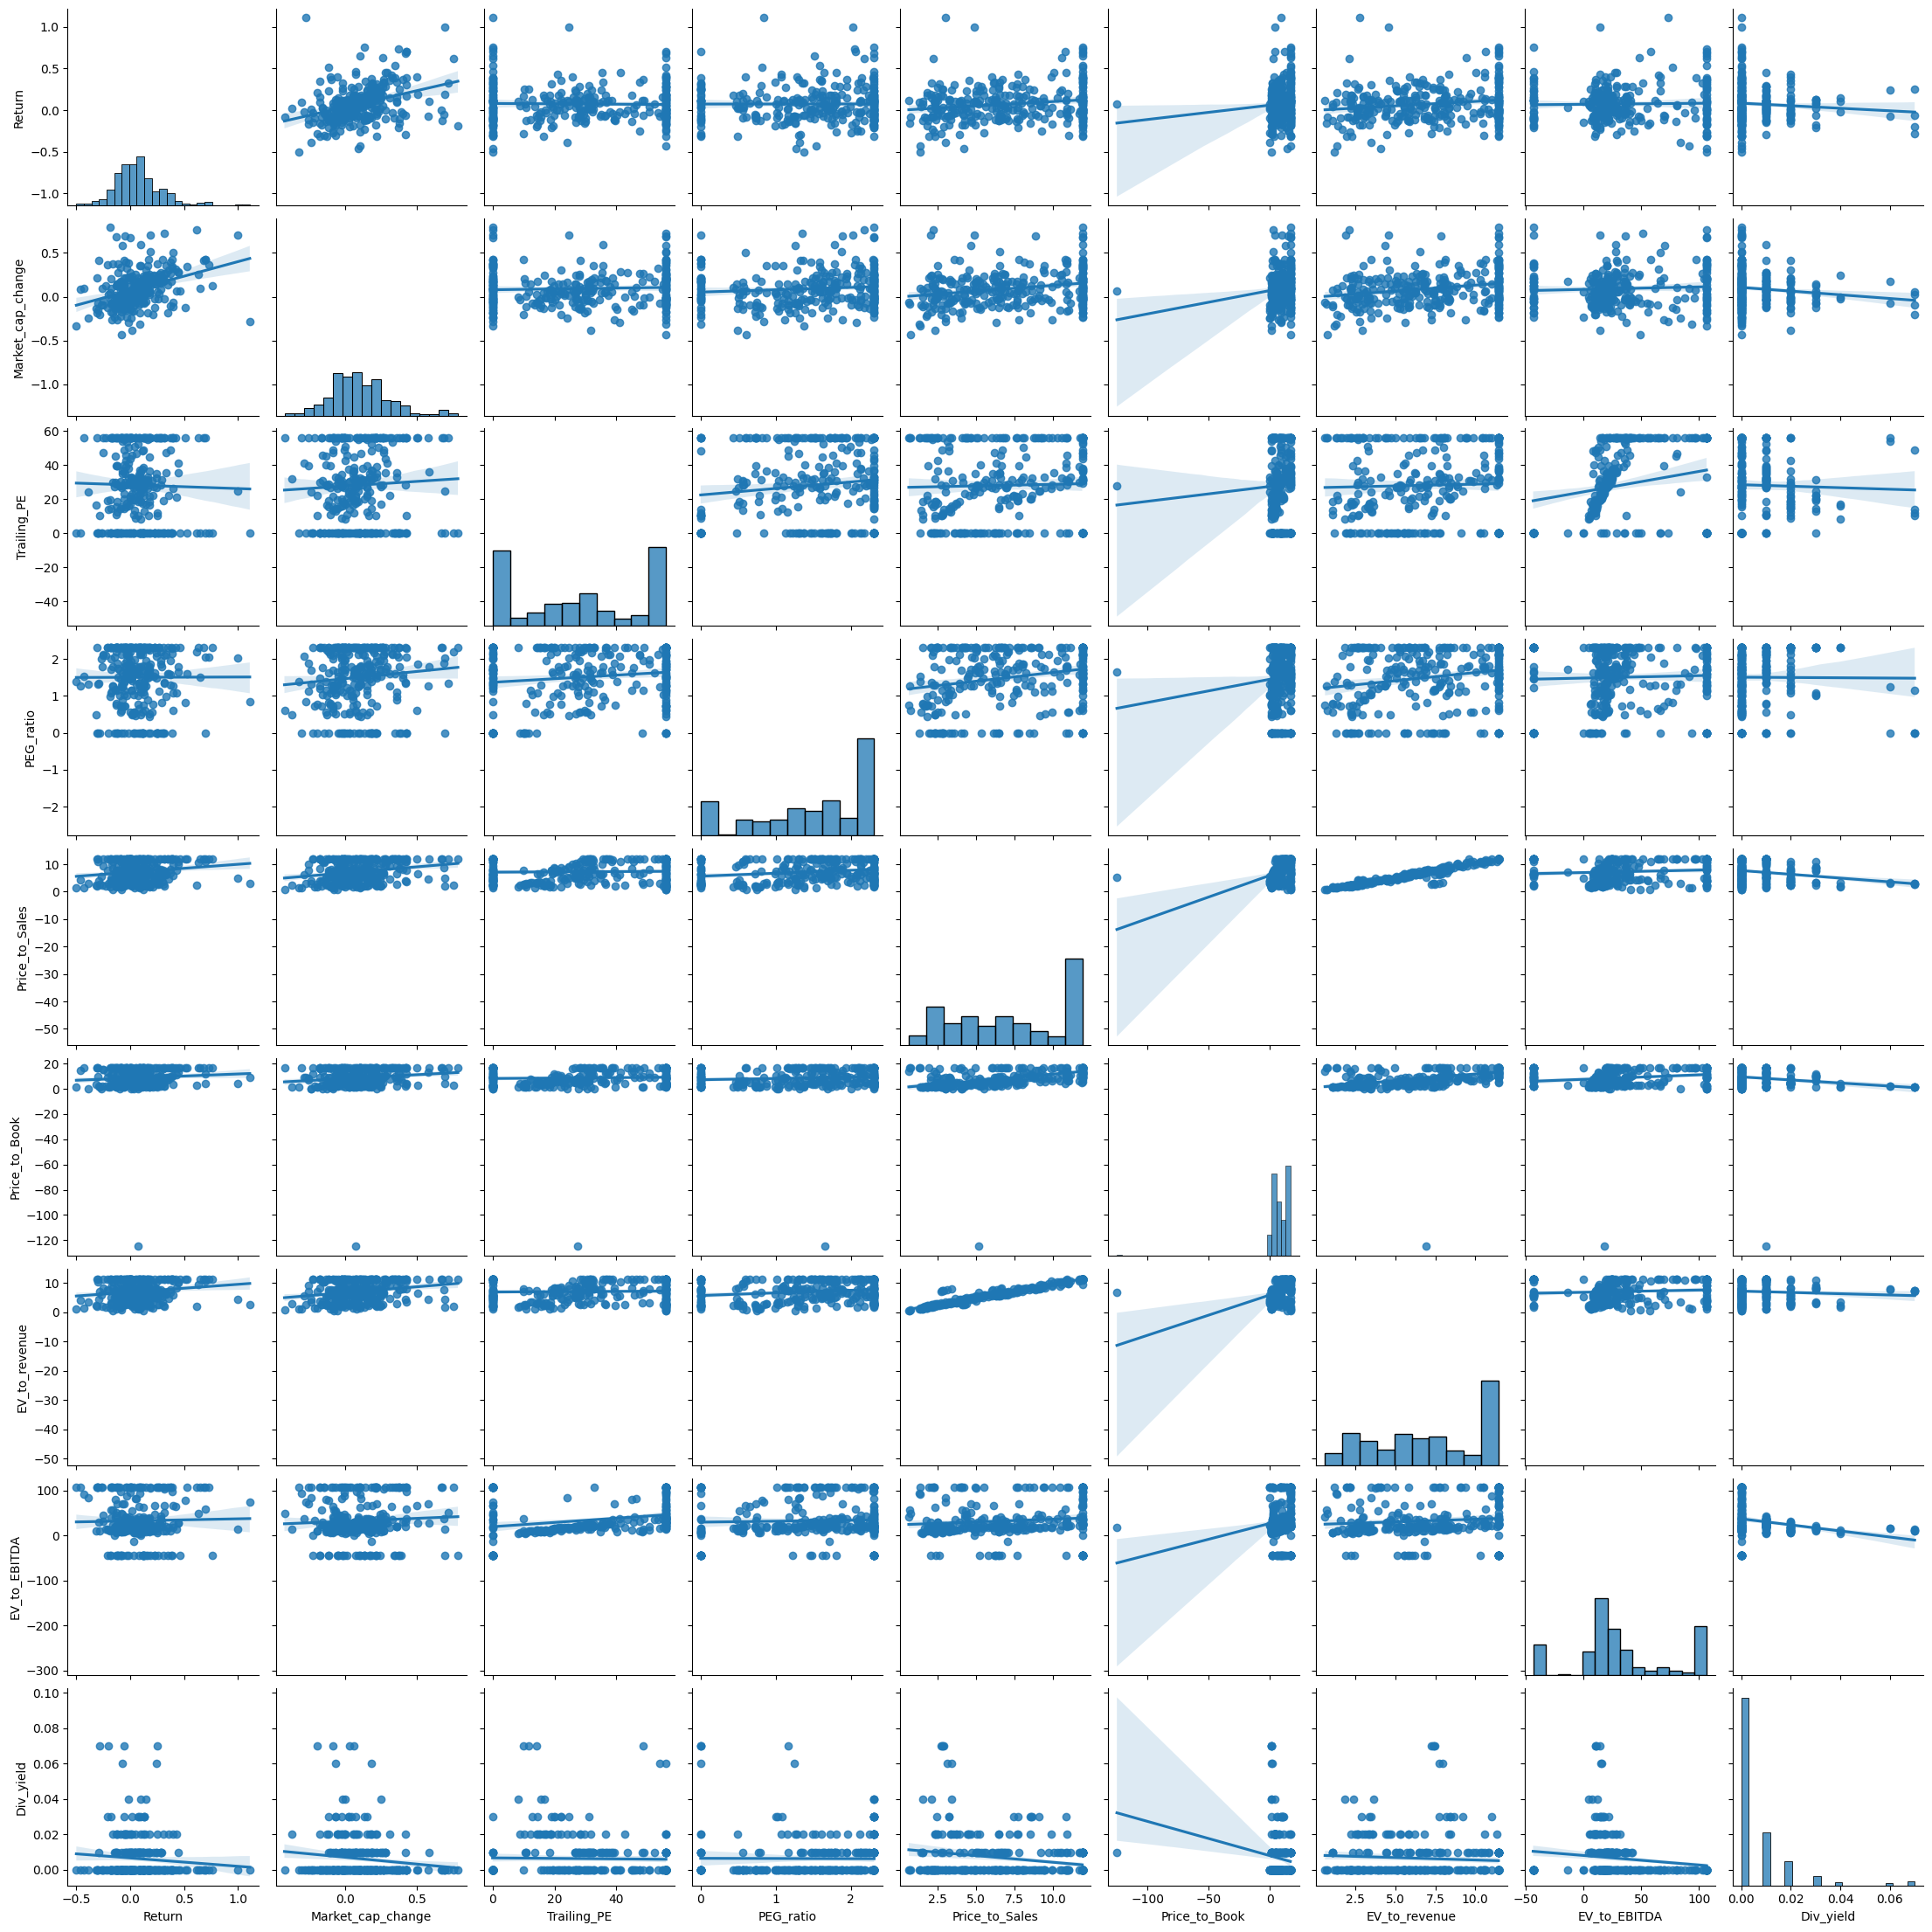

In [11]:
# Create a pairplot to visualize pairwise relationships between variables in the data
sns.pairplot(df0, kind='reg');

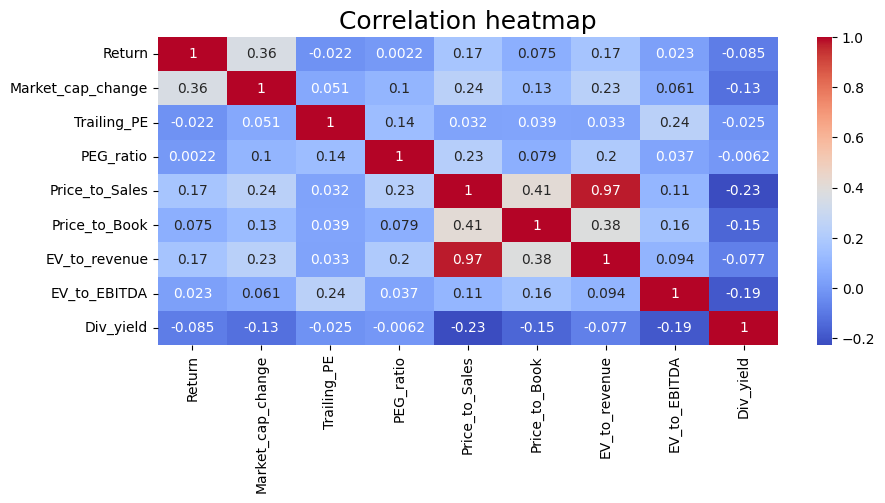

In [12]:
# Create correlation heatmap
plt.figure(figsize=(10,4))
sns.heatmap(df0.corr(method='pearson'), annot=True, cmap='coolwarm')
plt.title('Correlation heatmap', fontsize=18)
plt.show()

### Building model

In [58]:
# Define the OLS formula.
ols_formula = 'Return ~ Market_cap_change + Trailing_PE + PEG_ratio + Price_to_Sales + Price_to_Book + EV_to_revenue + EV_to_EBITDA + Div_yield'

# Create an OLS model.
OLS = ols(formula = ols_formula, data = df0)

# Fit the model.
model = OLS.fit()

# Save the results summary.
model_results = model.summary()
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Return   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     6.062
Date:                Thu, 30 May 2024   Prob (F-statistic):           3.22e-07
Time:                        21:34:03   Log-Likelihood:                 51.946
No. Observations:                 300   AIC:                            -85.89
Df Residuals:                     291   BIC:                            -52.56
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0292      0.037      0.795      0.427      -0.043       0.101
Market_cap_change     0.3701      0.061      6.043      0.000       0.250       0.491
Trailing_PE          -0.0004      0.001     -0.632      0.528      -0.001       0.001
PEG_ratio            -0.0143      0.016     -0.873      0.383      -0.046       0.018
Price_to_Sales        0.0050      0.021      0.245      0.806      -0.035       0.046
Price_to_Book        -0.0002      0.001     -0.141      0.888      -0.003       0.003
EV_to_revenue         0.0013      0.021      0.060      0.952      -0.040       0.043
EV_to_EBITDA      -4.028e-06      0.000     -0.014      0.989      -0.001       0.001
Div_yield            -0.4194      1.396     -0.300      0.764      -3.166       2.328
==============================================================================
Omnibus:                       65.362   Durbin-Watson:                   3.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.730
Skew:                           0.877   Prob(JB):                     7.20e-54
Kurtosis:                       7.062   Cond. No.                     7.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Check model assumptions

**Model assumption 1: Linearity**

=> Scatterplots

**Model assumption 2: Independence** 

=> The independent observation assumption states that each observation in the dataset is independent.

**Model assumption 3: Normality**

Create the following plots to check
:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

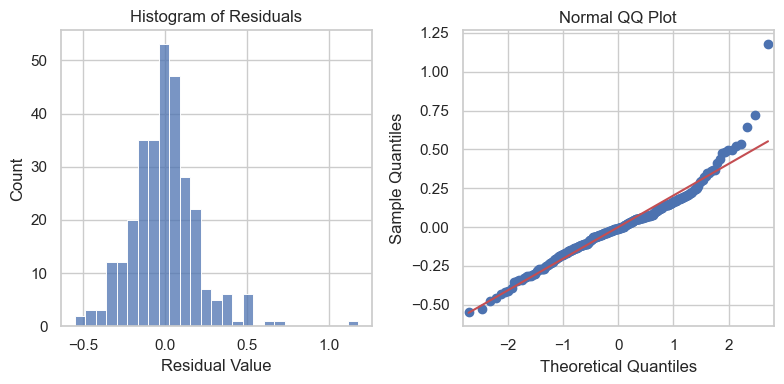

In [56]:
# Calculate the residuals.
residuals = model.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals. 
sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")

# Create a Q-Q plot of the residuals.
sm.qqplot(residuals, line='s',ax = axes[1])
axes[1].set_title("Normal QQ Plot")
plt.tight_layout()

plt.show()

**Model assumption 4: Constant variance**

Check that the **constant variance assumption** is not violated by creating a scatterplot with the predicted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

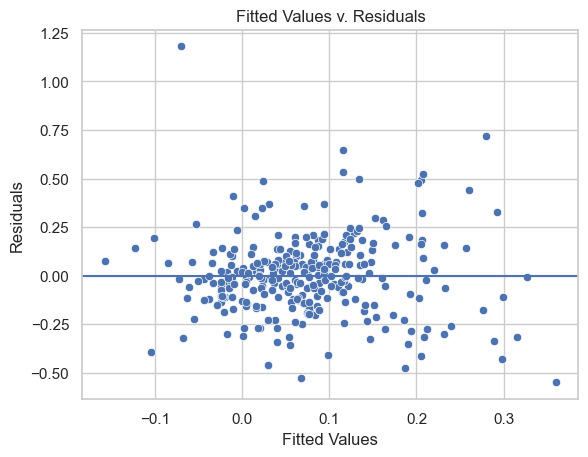

In [54]:
# Create a scatterplot with the fitted values from the model and the residuals.
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
fig.set_title("Fitted Values v. Residuals")
fig.axhline(0)
plt.show()

**Model assumption: No multicollinearity**

The **no multicollinearity assumption** states that no two independent variables ($X_i$ and $X_j$) can be highly correlated with each other. mption.

In [60]:
# Import variance_inflation_factor from statsmodels.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a subset of the data with the continous independent variables. 
X = df0[['Market_cap_change', 'Trailing_PE', 'PEG_ratio', 
                   'Price_to_Sales', 'Price_to_Book', 'EV_to_revenue', 'EV_to_EBITDA', 'Div_yield']]

# Calculate the variance inflation factor for each variable.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# Display the VIF results.
df_vif


,VIF
Market_cap_change,1.308449
Trailing_PE,2.636899
PEG_ratio,4.335567
Price_to_Sales,195.349543
Price_to_Book,2.228803
EV_to_revenue,194.826407
EV_to_EBITDA,1.737723
Div_yield,2.450810


### Model evaluation

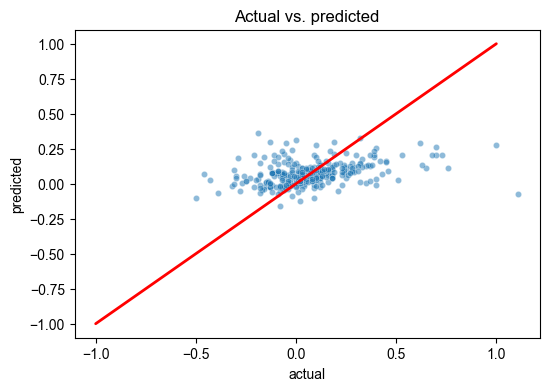

In [17]:
# Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize=(6, 4))
sns.set(style='whitegrid')
sns.scatterplot(x='actual', y='predicted', data=results,
                s=20, alpha=0.5, ax=ax)

# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([-1,1], [-1,1], c='red', linewidth=2)
plt.title('Actual vs. predicted');

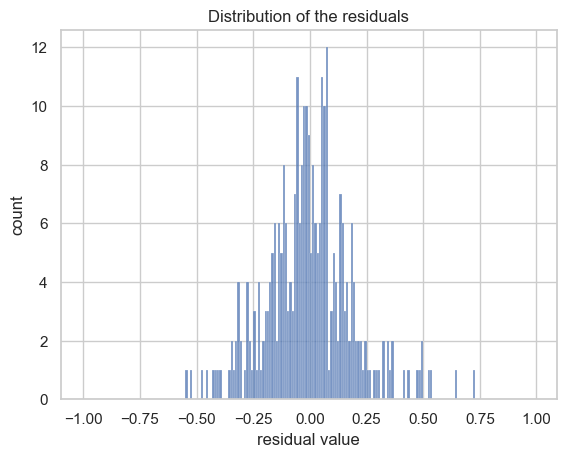

In [18]:
# Visualize the distribution of the `residuals`
sns.histplot(results['residual'], bins=np.arange(-1,1,0.01))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');